<a href="https://colab.research.google.com/github/pennya6/AI_study/blob/main/computervision/dogandcats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

data_dir='/content/MyDrive/MyDrive/Colab Notebooks/러닝스푼즈/컴비/dogsandcats'
data_dir=pathlib.Path(data_dir)

In [ ]:
data_dir

PosixPath('/content/MyDrive/MyDrive/Colab Notebooks/러닝스푼즈/컴비/dogsandcats')

In [ ]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

832


Make train data set

In [ ]:
batch_size=32
img_height=180
img_width=180

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    image_size=(img_height,img_width),
    seed=1,
    batch_size=batch_size
)

Found 832 files belonging to 2 classes.
Using 666 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height,img_width),
    seed=1,
    batch_size=batch_size
)

Found 832 files belonging to 2 classes.
Using 166 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['cats', 'dogs']


plot images

In [ ]:
import matplotlib.pyplot as plt

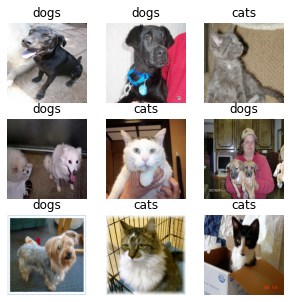

In [ ]:
plt.figure(figsize=(5,5))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
labels_batch #1->강아지/ 0->고양이

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int32)>

In [ ]:
#벡터화
mylist=list(labels_batch)

In [ ]:
from keras.utils import np_utils
mylist=np_utils.to_categorical(mylist)
mylist.shape

(32, 2)

In [ ]:
mylist

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

create model

In [ ]:
num_classes = 2

#네트워크
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

training

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
21/21 [==============================] - 61s 3s/step - loss: 0.9254 - accuracy: 0.4865 - val_loss: 0.6936 - val_accuracy: 0.4940
Epoch 2/10
21/21 [==============================] - 24s 1s/step - loss: 0.6813 - accuracy: 0.5781 - val_loss: 0.6875 - val_accuracy: 0.5422
Epoch 3/10
21/21 [==============================] - 24s 1s/step - loss: 0.6317 - accuracy: 0.6622 - val_loss: 0.6587 - val_accuracy: 0.6145
Epoch 4/10
21/21 [==============================] - 24s 1s/step - loss: 0.5362 - accuracy: 0.7342 - val_loss: 0.6137 - val_accuracy: 0.6988
Epoch 5/10
21/21 [==============================] - 24s 1s/step - loss: 0.4643 - accuracy: 0.8033 - val_loss: 0.6397 - val_accuracy: 0.6747
Epoch 6/10
21/21 [==============================] - 24s 1s/step - loss: 0.3404 - accuracy: 0.8724 - val_loss: 0.7960 - val_accuracy: 0.6145
Epoch 7/10
21/21 [==============================] - 24s 1s/step - loss: 0.2694 - accuracy: 0.9099 - val_loss: 1.0490 - val_accuracy: 0.6566
Epoch 8/10
21/21 [==

training result

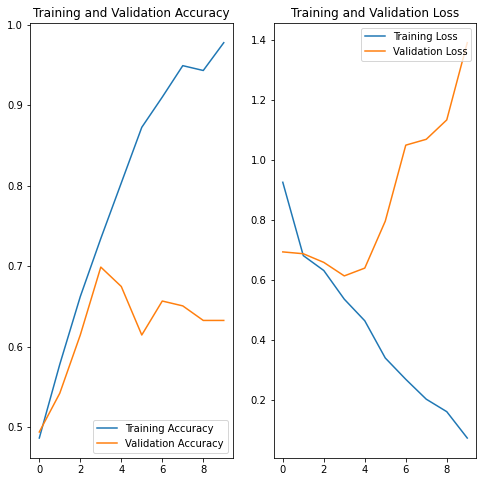

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to cats with a 55.94 percent confidence.
